**Import Dependencies**

In [ ]:
import math
import cv2
import numpy as np
from PIL import Image, ImageStat
from numpy import asarray
from matplotlib import pyplot as plt

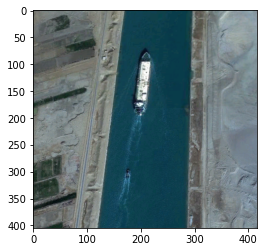

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Suez Canal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
# Erosion
def erosion_img(input_img,s):
  output = np.zeros((input_img.shape[0],input_img.shape[1],3), dtype=np.uint8)
  pad_value = int((s)/2)
  min_red = 0
  min_green = 0
  min_blue = 0  
  
  red_values = np.array(input_img[:,:,0],dtype=np.uint8)
  green_values = np.array(input_img[:,:,1],dtype=np.uint8)
  blue_values = np.array(input_img[:,:,2],dtype=np.uint8)

  for i in range(pad_value,input_img.shape[0]-pad_value):
    for j in range(pad_value,input_img.shape[1]-pad_value):
        min_red = (red_values[(i-pad_value):(i+(pad_value+1)),(j-pad_value):(j+(pad_value+1))])
        min_green = (green_values[i-pad_value:i+(pad_value+1),j-pad_value:j+(pad_value+1)])
        min_blue = (blue_values[i-pad_value:i+(pad_value+1),j-pad_value:j+(pad_value+1)])
        red_min = np.min(min_red)
        blue_min = np.min(min_blue)
        green_min = np.min(min_green)
        output[i,j,0] = red_min
        output[i,j,1] = green_min
        output[i,j,2] = blue_min

  return output


# Dilation
def dilation_img(input_img,s):
  output = np.zeros((input_img.shape[0],input_img.shape[1],3), dtype=np.uint8)
  pad_value = int((s)/2)
  min_red = 0
  min_green = 0
  min_blue = 0  
  red_values = np.array(input_img[:,:,0],dtype=np.uint8)
  green_values = np.array(input_img[:,:,1],dtype=np.uint8)
  blue_values = np.array(input_img[:,:,2],dtype=np.uint8)

  for i in range(pad_value,input_img.shape[0]-pad_value):
    for j in range(pad_value,input_img.shape[1]-pad_value):
        max_red = (red_values[(i-pad_value):(i+(pad_value+1)),(j-pad_value):(j+(pad_value+1))]) # plus as the upper bound is exclusive
        max_green = (green_values[i-pad_value:i+(pad_value+1),j-pad_value:j+(pad_value+1)])
        max_blue = (blue_values[i-pad_value:i+(pad_value+1),j-pad_value:j+(pad_value+1)])
        red_max = np.max(max_red)
        blue_max = np.max(max_blue)
        green_max = np.max(max_green)
        output[i,j,0] = red_max
        output[i,j,1] = green_max
        output[i,j,2] = blue_max

  return output

# Opening
def opening_img(input_img,s):
  eroded_img = erosion_img(input_img,s)
  opened_img = dilation_img(eroded_img,s)
  
  return opened_img

# Closing
def closing_img(input_img,s):
  dilated_img = dilation_img(input_img,s)
  closed_img = erosion_img(dilated_img,s)
  return closed_img

# Required Function to increase the contrast
def contrast_func(input_img,s,a,b):
  # contrast_img = (input_img + a*(input_img- opening_img(input_img,s)) - b*(closing_img(input_img,s)-input_img))
  contrast_img= cv2.subtract(cv2.add(input_img,(a*(cv2.subtract(input_img,opening_img(input_img,s))))),(b*(cv2.subtract(closing_img(input_img,s),input_img))))
  return contrast_img 

def contrast_Reduce_func2(input_img,s,a,b):
  # contrast_img = (input_img + b*(closing_img(input_img,s)-input_img) - a*(input_img- opening_img(input_img,s)))
  contrast_img= cv2.subtract(cv2.add(input_img,(b*(cv2.subtract(closing_img(input_img,s),input_img)))),(a*(cv2.subtract(input_img,opening_img(input_img,s)))))
  return contrast_img 
  

**Saving the Images Required:**

In [ ]:
# • The output image with a square structuring element of size 3 x 3 when a = 1 and b = 1. 
contrast_img1 = contrast_func(img,3,1,1)
cv2.imwrite('/content/gdrive/MyDrive/contrast_img(3x3,a=1,b=1).png',cv2.cvtColor(contrast_img1, cv2.COLOR_RGB2BGR))

# • The output image with a square structuring element of size 9 x 9 when a = 1 and b = 1. 
contrast_img2 = contrast_func(img,9,1,1)
cv2.imwrite('/content/gdrive/MyDrive/contrast_img(9x9,a=1,b=1).png',cv2.cvtColor(contrast_img2, cv2.COLOR_RGB2BGR))

# • The output image with a square structuring element of size 3 x 3 when a = 5 and b = 1. 
contrast_img3 = contrast_func(img,3,5,1)
cv2.imwrite('/content/gdrive/MyDrive/contrast_img(3x3,a=5,b=1).png',cv2.cvtColor(contrast_img3, cv2.COLOR_RGB2BGR))

# • The output image with a square structuring element of size 3 x 3 when a = 1 and b = 5. 
contrast_img4 = contrast_func(img,3,1,5)
cv2.imwrite('/content/gdrive/MyDrive/contrast_img(3x3,a=1,b=5).png',cv2.cvtColor(contrast_img4, cv2.COLOR_RGB2BGR))



True

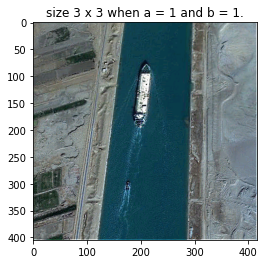

In [ ]:
plt.title('size 3 x 3 when a = 1 and b = 1.')
plt.imshow(contrast_img1)

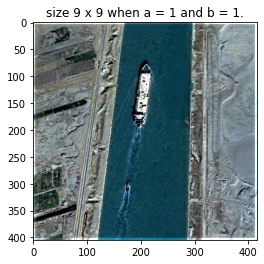

In [ ]:
plt.title('size 9 x 9 when a = 1 and b = 1.')
plt.imshow(contrast_img2)

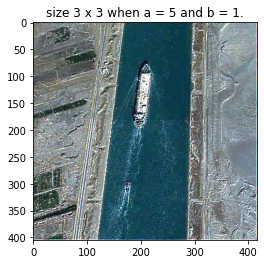

In [ ]:
plt.title('size 3 x 3 when a = 5 and b = 1.')
plt.imshow(contrast_img3)

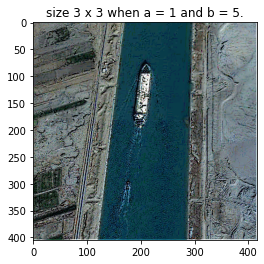

In [ ]:
plt.title('size 3 x 3 when a = 1 and b = 5.')
plt.imshow(contrast_img4)

**Suggested Equation to reduce the Contrast:**


---
Contrast-reduced Image = Original Image + b x (closing_img -Original Image) - a x (input_img- opening_img)

- To make the dark areas brighter and the brighter areas darker.

In [ ]:
# Testing the Suggested equation for reducing the contrast
contrast_img12 = contrast_Reduce_func2(img,3,1,1)
contrast_img22 = contrast_Reduce_func2(img,9,1,1)
contrast_img32 = contrast_Reduce_func2(img,3,5,1)
contrast_img42 = contrast_Reduce_func2(img,3,1,5)

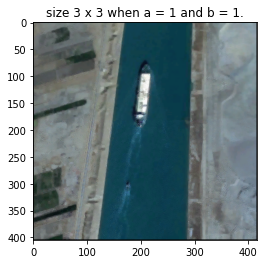

In [ ]:
plt.title('size 3 x 3 when a = 1 and b = 1.')
plt.imshow(contrast_img12)

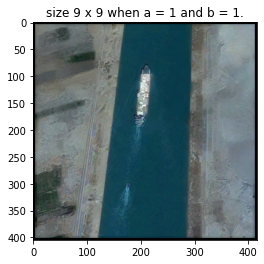

In [ ]:
plt.title('size 9 x 9 when a = 1 and b = 1.')
plt.imshow(contrast_img22)

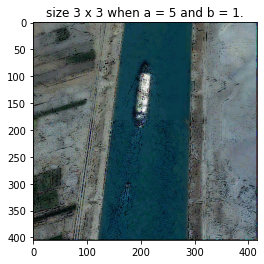

In [ ]:
plt.title('size 3 x 3 when a = 5 and b = 1.')
plt.imshow(contrast_img32)

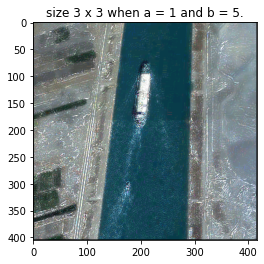

In [ ]:
plt.title('size 3 x 3 when a = 1 and b = 5.')
plt.imshow(contrast_img42)


**Answers to the questions in the description:**
---



---



**How the equation given increase contrast:**

---

The equation increases the contrast of the image as follows:
- Subtracting the Opening of the original image from the original image results in getting the bright features in the image that are within the SE window. (result a)
- Subtracting the Closing of the original image from the Original image results in getting the dark features in the original image that are within the SE window.(result b)
- Contrast main idea is making the bright areas brighter and the dark areas darker.
- So by adding result a to the original image, we get the original image with brighter bright areas.
- And by subrtacting the reverse of result b from the original image, we get the original image with the dark areas darker.
- So the last two bullet points added together apply the concept of contrast.

**Effect of increasing size of the structuring element:**

---


As shown above in the output images, When 9x9 structuring element was used, tiny details in the image are not well preserved as more colors are considered in the neighborhood of the current pixel to pick either max/min from and assign this new color to the pixel which results in loss of details. The image becomes worse than when 3x3 window was used for the SE. The resulting image has more noise as we increase the size of the SE and the features of the foreground are more clear and dominant while the background is filled more and more with noisy pixels.

**Effect of increasing/decrasing a and b:**

---



**For a:** increasing **a** makes the edges (bright areas) in the image whiter (brighter). 

---

**For b:** increasing **b** makes the edges (dark areas) in the image more black (darker). 

---



---

---



